#  **Project: Capstone Project 1 – (Data Storytelling Exercise section 7.2)**

**Project name: -** Explanatory Analysis of Traffic pullover pattern for Florida v/s Vermont

**Student Name: -** Jitendra Agarwal 

**Course: -** Springboard cohort Jan2 2018
  
**Data set Source: -** https://openpolicing.stanford.edu/data/ 

**Data provider: -** Openpolicing project by Stanford


## **About the DATA**
The Raw data for this project contains the traffic stop data collected for 30+ states for open police project by Stanford research team. Standardized stop data are available to download (by state) from the link above provided by Stanford.
The csv includes a subset of common fields for each state and indicates whether data are available for at least 70% of records in that state. Some states have more fields.
The original, unprocessed data we collected contain even more information.
The Stanford Open Policing Project data are made available under the Open Data Commons Attribution License.

Downloaded excel sheet of raw data for VT: -
https://github.com/jiagarwa/capstone-project1-Jitendra

file name: - ‘VT-clean.csv.gz’

### **Accessing and filtering the Data**

1. **Read data **

    Read Data from csv file VT-clean.csv and Show the all columns of data and their data type.

In [2]:
#Import Pandas and read csv into a DataFrame

import pandas as pd
data = pd.read_csv('../data/VT-clean.csv')
df = pd.DataFrame(data)

df.info()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283285 entries, 0 to 283284
Data columns (total 23 columns):
id                       283285 non-null object
state                    283285 non-null object
stop_date                283285 non-null object
stop_time                283285 non-null object
location_raw             282591 non-null object
county_name              282580 non-null object
county_fips              282580 non-null float64
fine_grained_location    282938 non-null object
police_department        283285 non-null object
driver_gender            281573 non-null object
driver_age_raw           282114 non-null float64
driver_age               281999 non-null float64
driver_race_raw          279301 non-null object
driver_race              278468 non-null object
violation_raw            281107 non-null object
violation                281107 non-null object
search_conducted         283285 non-null bool
search_type_raw          281045 non-null object
search_type             

2. **Filter data for Year 2015: -**

    Convert data into a data frame and filter based on year from stop_date column and save in a separate file Filter data by year 2015. Call it VT_2015.csv

In [3]:
#Filter 2015 Traffic data based on year in the stop_date column
traffic_2015 = df.loc[pd.to_datetime(df['stop_date']).dt.year == 2015]
traffic_2015.to_csv('../data/VT_2015.csv')

1. **Data Observations: **
    we have a pretty consistence data population throughout the year and all the attributes are populated across the board.

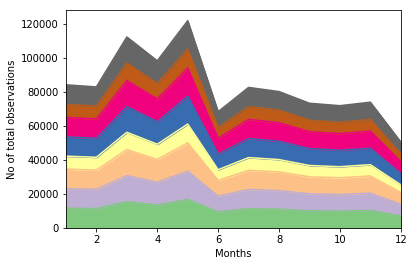

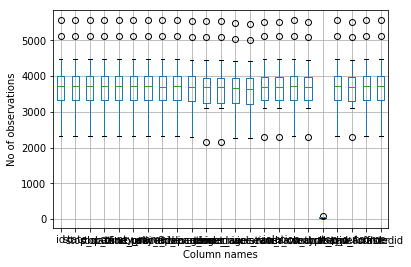

In [4]:
#check monthly total counts and use it to draw area plot and Box plot
import matplotlib.pyplot as plt

monthly_traffic = traffic_2015.groupby(pd.to_datetime(traffic_2015['stop_date']).dt.month).count()
monthly_traffic.plot.area(legend = False, colormap='Accent')

plt.xlabel('Months')
plt.ylabel('No of total observations')
plt.show()

monthly_traffic.boxplot()
plt.xlabel('Column names')
plt.ylabel('No of observations')
plt.show()

• **Drop rows with missing key data**

    Drop records where the traffic stop reason or the stop outcome is unknown. 
    These records will not be useful in any meaningful analysis.
    

In [5]:
VT_traf_2015_main = traffic_2015.dropna(subset = ['violation', 'stop_outcome'])
VT_traf_2015_main.loc['driver_race'] = VT_traf_2015_main['driver_race'].fillna('Other')

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### **Import Numphy and Aggregate data for further analysis**

Most of the reports in this exploratory analysis will be done based on logical grouping of data by date, time and other factors So aggregating data upfront is also useful. We will use pivot table features for aggregating data based on these criteria for analysis.

- Aggregate by time of the day (slot of 4 hours)
- Aggregate by day of the week
- Aggregate by month
- Aggregate by age range (each slot of 10 years)

In [6]:
#Aggregate by age

import numpy as np
VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=['driver_age'], columns=['driver_gender'], 
                            aggfunc=np.count_nonzero)

In [7]:
#Aggregate by Month

VT_agg_month = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])
                                                                     .dt.month], columns=['driver_gender'], aggfunc=np.count_nonzero)

In [8]:
#Aggregate by hour of the day

VT_agg_time = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour, columns=['driver_gender'], aggfunc=np.count_nonzero)

In [9]:
# Number of average monthly stop

female_monthly_averages = VT_agg_month.aggregate({"F":np.mean})
male_monthly_averages = VT_agg_month.aggregate({"M":np.mean})
print('Number of average monthly stop for Male are:', np.around(male_monthly_averages['M'], decimals=-1),
      ' and Number of average monthly stop for Female are: ' ,np.around(female_monthly_averages['F'], decimals=-1))

Number of average monthly stop for Male are: 2400.0  and Number of average monthly stop for Female are:  1370.0


In [10]:
#Number of average Daily stop

VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date'])
                             ,columns=['driver_gender'], aggfunc=np.count_nonzero)
weekday_averages = VT_agg_date.aggregate({np.mean})
print('Number of average Daily stop for Male are: ', np.around(weekday_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(weekday_averages['F']['mean'], decimals=0))

Number of average Daily stop for Male are:  79.0  and same Number of Female is:  45.0


In [11]:
# Approx Number of average stop per hour

VT_agg_hour = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']), 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
hourly_averages = VT_agg_hour.aggregate({np.mean})

print('Approx Number of average stop per hour for Male are: ', np.around(hourly_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(hourly_averages['F']['mean'], decimals=0))

Approx Number of average stop per hour for Male are:  4.0  and same Number of Female is:  3.0


  2. **Exploratory Analysis to find something interesting. **
    
      • **Traffic stops by race.**

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


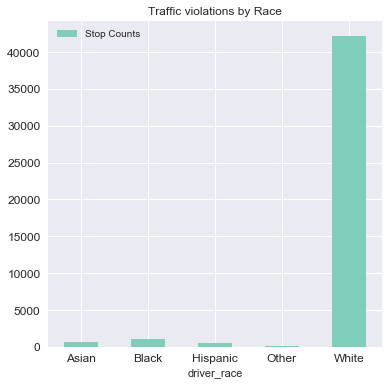

In [19]:
# Plot Traffic stops by race
import seaborn as sns
sns.set()

VT_race_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['driver_race'], columns=['driver_gender'], aggfunc=np.count_nonzero)  
total = VT_race_gender.apply(np.sum)
VT_race_gender['M%'] = np.around((VT_race_gender['M'] / total['M'])* 100, decimals=2) 
VT_race_gender['F%'] = np.around((VT_race_gender['F'] / total['F'])* 100, decimals=2)
VT_race_gender['total'] = (VT_race_gender['F'] + VT_race_gender['M'])
VT_race_gender['total'].plot(kind='bar', figsize=(6, 6), label = 'Stop Counts', fontsize=12, legend=True, 
                                colors=['#7fcdbb'])
plt.xticks(rotation=0)
plt.title('Traffic violations by Race')
plt.show()

    • **Traffic violations by Type and % Traffic Stop Outcome**


In [20]:
# %Traffic stops by Arrest 

VT_arrest_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['is_arrested'], columns=['driver_gender'], aggfunc=np.count_nonzero) 
total = VT_arrest_gender.apply(np.sum)
VT_arrest_gender['M%'] = np.around((VT_arrest_gender['M'] / total['M'])* 100, decimals=2) 
VT_arrest_gender['F%'] = np.around((VT_arrest_gender['F'] / total['F'])* 100, decimals=2) 
print(VT_arrest_gender)

driver_gender      F      M     M%     F%
is_arrested                              
0.0            16276  28426  98.66  99.26
1.0              121    385   1.34   0.74


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


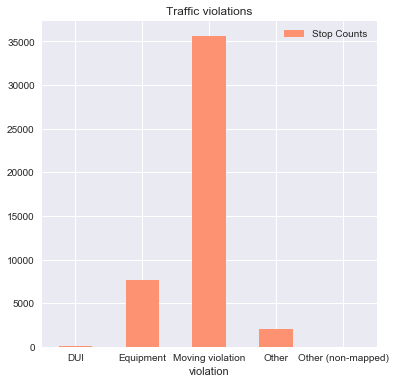

In [21]:
# Show the ratio of different type of violation

VT_violation = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['violation'], aggfunc=np.count_nonzero)
VT_violation['id'].plot(kind='bar', figsize=(6, 6), label = 'Stop Counts', fontsize=10, legend=True, mark_right=True, colors=['#fc9272','b','g'])
plt.xticks(rotation=0)
plt.title('Traffic violations')
plt.show()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


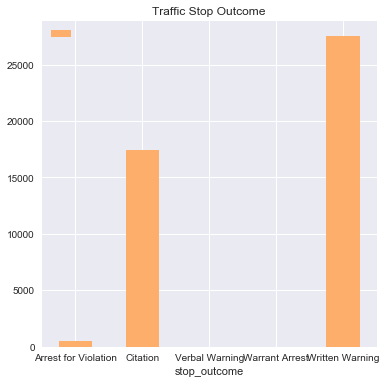

In [22]:
# Show the ratio of different type of violation

VT_stop_outcome = pd.pivot_table(VT_traf_2015_main, values='id', index=VT_traf_2015_main['stop_outcome'], aggfunc=np.count_nonzero)
VT_stop_outcome['id'].plot(kind='bar', figsize=(6, 6), label = '', fontsize=10, legend=True, colors=['#fdae6b','#9ebcda','#f03b20','#ffeda0','#8856a7'])
plt.title('Traffic Stop Outcome')
plt.xticks(rotation=0)
plt.show()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


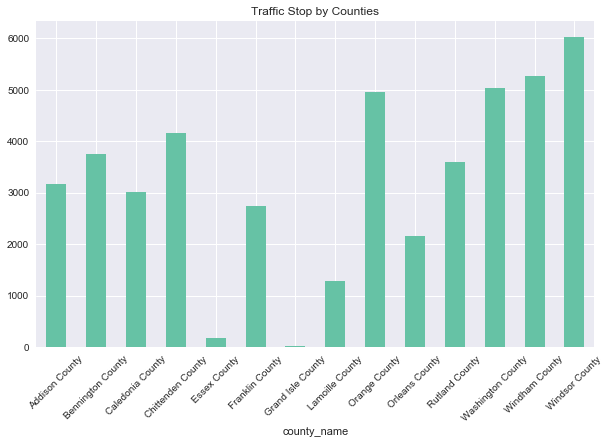

In [24]:
#Traffic stops distribution by Various counties

VT_county_name = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['county_name'], aggfunc=np.count_nonzero)
VT_county_name['id'].plot(kind='bar', figsize=(10, 6), label = 'county_name', fontsize=10, 
                              colors=['#66c2a5','#fc8d62','#a6bddb','#fbb4ae','#ccebc5','#2b8cbe','#addd8e'])
plt.plot.legend=True
plt.title('Traffic Stop by Counties')
plt.xticks(rotation=45)
plt.show()

3. **Finding trends**

    • **Comparison of Male v/s Female in traffic stops over weekdays**

driver_gender     F     M
stop_date                
0.0            2423  3803
1.0            2238  3665
2.0            2379  4009
3.0            2308  4017
4.0            2823  5094
5.0            2271  4449
6.0            1955  3774


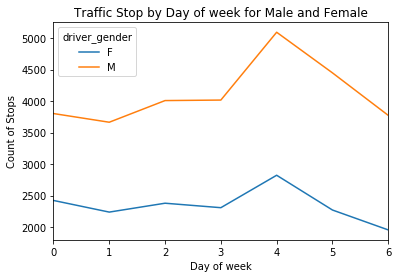

In [17]:
#Aggregate by Day of week

VT_agg_day = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date']).
                            dt.dayofweek, columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_day)
VT_agg_day.plot(kind='line', legend = 'Driver gender')
plt.xlabel('Day of week')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [69]:
# Top 5 hours of the day for traffic stops

VT_top_time_M = pd.DataFrame(VT_agg_time.nlargest(5, 'M'))
VT_top_time_F = pd.DataFrame(VT_agg_time.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_time_M['M'], '\n', VT_top_time_F['F'])

The most common time for traffic pullover for man is 
 stop_time
18.0    3132
17.0    2909
19.0    1943
15.0    1916
16.0    1875
Name: M, dtype: int64 
 stop_time
18.0    1861
17.0    1771
15.0    1171
16.0    1124
19.0    1089
Name: F, dtype: int64


In [70]:
# Top 5 hours of the day. Weekend has an increase or decrease in traffic stops?
VT_agg_hour_day = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek, 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_top_daytime_M = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'M'))
VT_top_daytime_F = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_daytime_M['M'], '\n', VT_top_daytime_F['F'])


The most common time for traffic pullover for man is 
 stop_date  stop_time
4.0        18.0         564.0
           17.0         478.0
0.0        18.0         457.0
2.0        18.0         444.0
3.0        18.0         436.0
Name: M, dtype: float64 
 stop_date  stop_time
4.0        17.0         321.0
0.0        18.0         307.0
4.0        18.0         305.0
0.0        17.0         283.0
1.0        18.0         282.0
Name: F, dtype: float64


• **Traffic stops over the time for entire week**


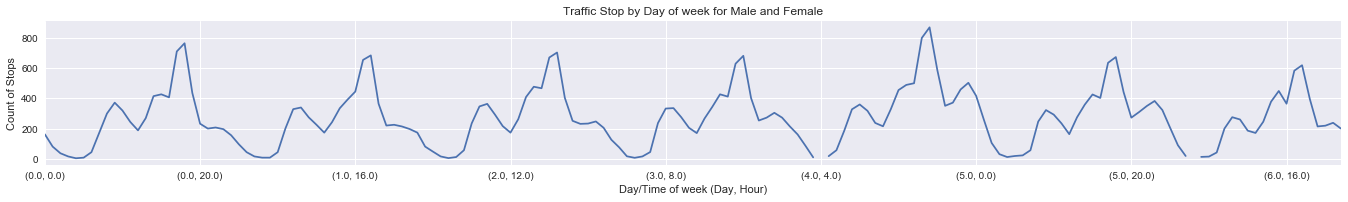

In [71]:
VT_agg_hour_day['total'] = (VT_agg_hour_day['F'] + VT_agg_hour_day['M'])
plt.axes([0, 0, 3, .5])
VT_agg_hour_day['total'].plot(kind='line', legend = False, )
plt.xlabel('Day/Time of week (Day, Hour)')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [72]:
# Top 5 hours of the day for traffic stops
VT_top_age_M = pd.DataFrame(VT_agg_age.nlargest(5, 'M'))
VT_top_age_F = pd.DataFrame(VT_agg_age.nlargest(5, 'F'))
print('The most common age of driver for traffic pullover for man is \n',
      VT_top_age_M['M'], '\n and for female it is \n', VT_top_age_F['F'])

The most common age of driver for traffic pullover for man is 
 driver_age
21.0    940.0
24.0    916.0
20.0    894.0
23.0    891.0
19.0    890.0
Name: M, dtype: float64 
 and for female it is 
 driver_age
22.0    567.0
24.0    556.0
23.0    543.0
25.0    509.0
21.0    504.0
Name: F, dtype: float64


In [73]:
# Most common reason for traffic stops

VT_agg_cause = pd.pivot_table(VT_traf_2015_main, values='id', index=VT_traf_2015_main['violation'], 
                              columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_cause.sort_values(('M'), ascending=[0]))

driver_gender             F        M
violation                           
Moving violation    12851.0  22610.0
Equipment            2808.0   4809.0
Other                 700.0   1312.0
DUI                    38.0     79.0
Other (non-mapped)      NaN      1.0


• **Histogram of age range and frequency of stops**


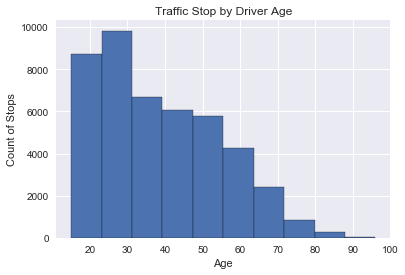

In [74]:
#Histogram of age ranges 
import seaborn as sns
sns.set()
VT_traf_2015_main['driver_age'].plot('hist', edgecolor="k", label = '', legend=False)
plt.xlabel('Age')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Driver Age')
plt.show()

• **Bar plot of Stop hour and count of stop at each hour.**


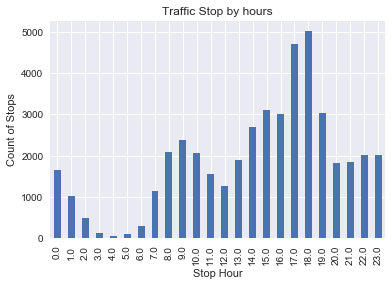

In [75]:
#bar plot of stop time hour
newdf = VT_traf_2015_main[['stop_time']].groupby(pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour).count()
newdf.plot(kind='bar', label = '', legend=False)
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by hours')
plt.show()

• **Bar plot of police departments and count of stop by each Department**


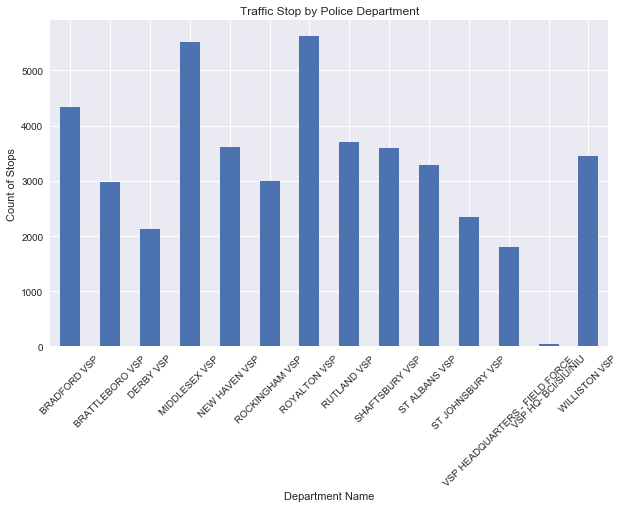

In [26]:
#bar plot of stop time hour 
newdf = VT_traf_2015_main[['police_department']].groupby(VT_traf_2015_main['police_department']).count()
newdf.plot(kind='bar', figsize=(10, 6), label = '', legend=False)
print()
plt.xlabel('Department Name')
plt.ylabel('Count of Stops')
plt.xticks(rotation=45)
plt.title('Traffic Stop by Police Department')
plt.show()

• **Compare by trend chart of Male V/s female and Driver age**


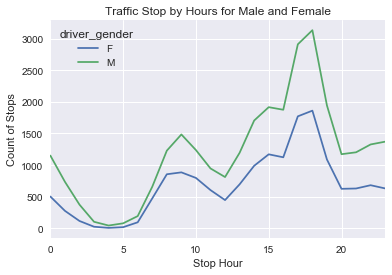

In [77]:
VT_agg_time.plot(kind='line', label = 'Driver gender')
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Hours for Male and Female')
plt.show()

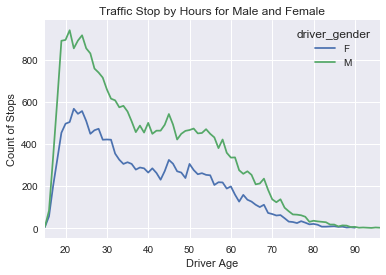

In [78]:
#Compare with trend chart of Male V/s female and Driver age
VT_agg_age.plot(kind='line')
plt.title('Traffic Stop by Hours for Male and Female')
plt.xlabel('Driver Age')
plt.ylabel('Count of Stops')
plt.show()

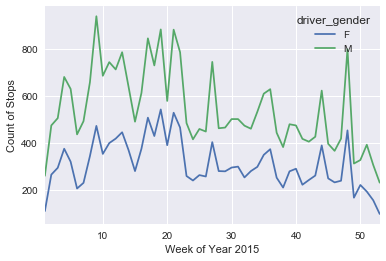

In [79]:
#Compare with trend chart of Male V/s female and time of the year (by week number)
VT_agg_week = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.week],
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_agg_week.plot(kind='line')
plt.xlabel('Week of Year 2015')
plt.ylabel('Count of Stops')
plt.show()

• **Time series plot**

    • Compare with trend chart of traffic stops over the dates of the entire year– using time series plot method.
 

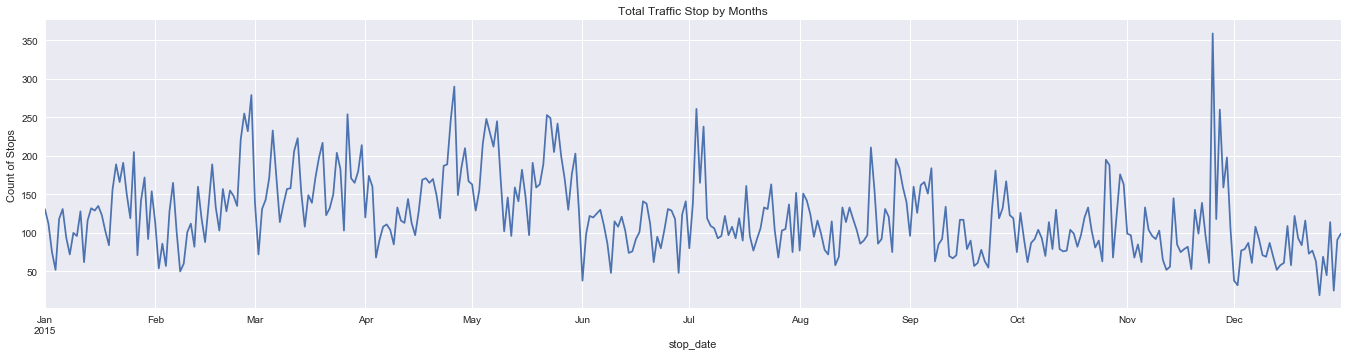

In [80]:
VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])],
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_agg_date['total'] = (VT_agg_date['F'] + VT_agg_date['M'])
ts = pd.Series(VT_agg_date['total'])
plt.axes([0, 0, 3, 1])
plt.xlabel('Month of the Year 2015')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Months')
ts.plot(label = '', legend=False)
plt.show()

   5. **Distribution using Scatter plot**

       There is not much numeric data in the data set for this project so we are using a partially aggregated dataset for scatter plot.
  
• **The average stop counts during the Day by different hours**

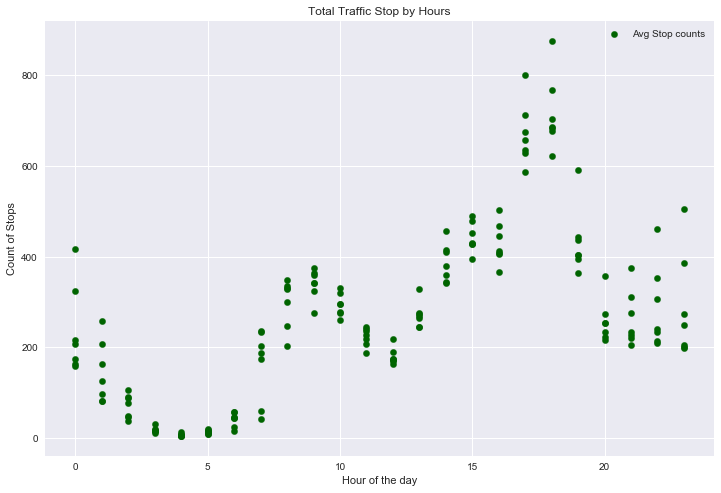

In [81]:
# add couple of new calculcated column to the original Data Frame
VT_traf_2015_main.is_copy = False
VT_traf_2015_main['hour'] = pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour
VT_traf_2015_main['dayofweek'] = pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek
VT_traf_2015_main.set_index(['hour', 'dayofweek'], append=True)

# create a new aggregated dataframe with new calculcated column and dra scatter plot
newdf2 = VT_traf_2015_main.groupby(['hour','dayofweek']).id.count().reset_index()
newdf2.plot.scatter(x='hour', y='id', figsize=(12, 8), color='DarkGreen', label='Avg Stop counts', s= 40);
plt.xlabel('Hour of the day')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Hours')
plt.show()

• **Plotting the Traffic stop distribution between Age and Time of day.**

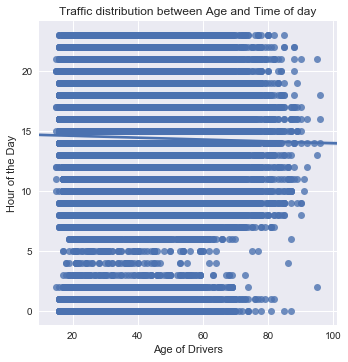

In [82]:
import seaborn as sns
sns.lmplot(x= 'driver_age', y= 'hour', data=VT_traf_2015_main)
plt.xlabel('Age of Drivers')
plt.ylabel('Hour of the Day')
plt.title('Traffic distribution between Age and Time of day')
plt.show()
